In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install pyarrow if not already installed
!pip install pyarrow

In [3]:
!pip install prophet

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

In [40]:
# Specify the file paths
file_path_jan = '/content/drive/MyDrive/Internships/AQM/pune-aqm-jan.csv' # Replace with your file path
file_path_feb = '/content/drive/MyDrive/Internships/AQM/pune-aqm-feb.csv'

In [41]:
data_jan = pd.read_csv(file_path_jan)
data_feb = pd.read_csv(file_path_feb)

In [42]:
print("January Data:")
print(data_jan.head())

January Data:
  airQualityLevel            observationDateTime deviceStatus  \
0        MODERATE  2021-12-31 18:31:08.000000000       ACTIVE   
1          SEVERE  2021-12-31 18:31:08.000000000       ACTIVE   
2       VERY_POOR  2021-12-31 18:31:09.000000000       ACTIVE   
3        MODERATE  2021-12-31 18:31:09.000000000       ACTIVE   
4        MODERATE  2021-12-31 18:31:09.000000000       ACTIVE   

  aqiMajorPollutant                                                 id  \
0                CO  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
1             PM2.5  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
2             PM2.5  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
3                CO  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
4             PM2.5  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   

   airQualityIndex uv.avgOverTime o3.avgOverTime pm2p5.avgOverTime  \
0              103              0           29.7              2.96   
1         

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
print("\nFebruary Data:")
print(data_feb.head())


February Data:
  airQualityLevel            observationDateTime deviceStatus  \
0    SATISFACTORY  2022-01-31 18:31:25.000000000       ACTIVE   
1    SATISFACTORY  2022-01-31 18:31:25.000000000       ACTIVE   
2    SATISFACTORY  2022-01-31 18:31:25.000000000       ACTIVE   
3    SATISFACTORY  2022-01-31 18:31:25.000000000       ACTIVE   
4    SATISFACTORY  2022-01-31 18:31:25.000000000       ACTIVE   

  aqiMajorPollutant                                                 id  \
0                CO  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
1               NO2  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
2               NO2  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
3               NO2  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   
4                CO  datakaveri.org/04a15c9960ffda227e9546f3f46e629...   

   airQualityIndex uv.avgOverTime o3.avgOverTime pm2p5.avgOverTime  \
0               71              0          32.97             16.94   
1       

In [45]:
# Combine the datasets
data = pd.concat([data_jan, data_feb], ignore_index=True)

In [46]:
# Basic information about the data
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32968 entries, 0 to 32967
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   airQualityLevel                  32968 non-null  object
 1   observationDateTime              32968 non-null  object
 2   deviceStatus                     32968 non-null  object
 3   aqiMajorPollutant                32968 non-null  object
 4   id                               32968 non-null  object
 5   airQualityIndex                  32968 non-null  int64 
 6   uv.avgOverTime                   32968 non-null  object
 7   o3.avgOverTime                   32968 non-null  object
 8   pm2p5.avgOverTime                32968 non-null  object
 9   co2.avgOverTime                  32967 non-null  object
 10  pm10.avgOverTime                 32967 non-null  object
 11  co.avgOverTime                   32967 non-null  object
 12  no2.avgOverTime     

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
airQualityLevel                    0
observationDateTime                0
deviceStatus                       0
aqiMajorPollutant                  0
id                                 0
airQualityIndex                    0
uv.avgOverTime                     0
o3.avgOverTime                     0
pm2p5.avgOverTime                  0
co2.avgOverTime                    1
pm10.avgOverTime                   1
co.avgOverTime                     1
no2.avgOverTime                    1
airTemperature.avgOverTime         1
illuminance.avgOverTime            1
ambientNoise.avgOverTime           1
so2.avgOverTime                    2
relativeHumidity.avgOverTime       2
atmosphericPressure.avgOverTime    2
dtype: int64


In [16]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       airQualityIndex
count     32968.000000
mean        152.564487
std         104.101522
min          21.000000
25%          78.000000
50%         101.000000
75%         225.000000
max         471.000000


### DATA PRE-PROCESSING

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats


In [18]:
# Preprocessing

# 1. Impute Missing Data: Replace -1 with NaN
data.replace(-1, np.nan, inplace=True)

In [19]:
# For numeric columns, fill NaN with mean or median
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [20]:
# For character data, fill NaN with the mode
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-20-c51e88bb988a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [21]:
# 2. Normalization: Min-Max Scaling for specified numerical columns
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [22]:
# 3. Standardization: Z-score normalization for specified numerical columns
standardizer = StandardScaler()
data[numeric_cols] = standardizer.fit_transform(data[numeric_cols])

In [23]:
# 5. Removal of outliers
# Using Z-score method
z_scores = np.abs(stats.zscore(data[numeric_cols]))
data_no_outliers_z = data[(z_scores < 3).all(axis=1)]

In [24]:

# Alternatively, using IQR method
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


In [25]:
# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
 #Removing outliers
data_no_outliers_iqr = data[~((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)]


In [27]:
# Print results
print(f"Original data size: {data.shape[0]}")
print(f"Data size after Z-score outlier removal: {data_no_outliers_z.shape[0]}")
print(f"Data size after IQR outlier removal: {data_no_outliers_iqr.shape[0]}")


Original data size: 32968
Data size after Z-score outlier removal: 32951
Data size after IQR outlier removal: 32908


In [28]:
# Descriptive statistics after outlier removal
print("\nDescriptive Statistics After Z-score Outlier Removal:")
print(data_no_outliers_z.describe())



Descriptive Statistics After Z-score Outlier Removal:
       airQualityIndex
count     32951.000000
mean         -0.001563
std           0.997901
min          -1.263829
25%          -0.716278
50%          -0.495336
75%           0.695827
max           2.991697


In [29]:

print("\nDescriptive Statistics After IQR Outlier Removal:")
print(data_no_outliers_iqr.describe())


Descriptive Statistics After IQR Outlier Removal:
       airQualityIndex
count     32908.000000
mean         -0.005347
std           0.993043
min          -1.263829
25%          -0.716278
50%          -0.495336
75%           0.686220
max           2.809180


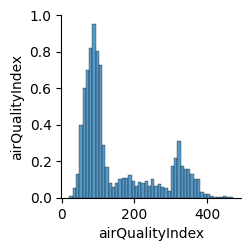

In [48]:

# Pairplot of selected features
selected_features = [
    'airQualityIndex', 'uv.avgOverTime', 'o3.avgOverTime', 'pm2p5.avgOverTime',
    'co2.avgOverTime', 'pm10.avgOverTime', 'co.avgOverTime', 'no2.avgOverTime',
    'airTemperature.avgOverTime', 'illuminance.avgOverTime', 'ambientNoise.avgOverTime',
    'so2.avgOverTime', 'relativeHumidity.avgOverTime', 'atmosphericPressure.avgOverTime'
]
sns.pairplot(data[selected_features])
plt.show()


In [59]:


# Convert observationDateTime to datetime format
data['observationDateTime'] = pd.to_datetime(data['observationDateTime'])

# Extract the date (YYYY-MM-DD) for daily aggregation
data['date'] = data['observationDateTime'].dt.date

# Exclude non-numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Aggregate numeric columns by mean, keeping non-numeric columns as is
daily_data = data.groupby('date')[numeric_columns].mean().reset_index()

# Verify the aggregated data
print(daily_data.head())


         date  airQualityIndex  uv.avgOverTime  o3.avgOverTime  \
0  2021-12-31       252.282561        0.000000       10.449842   
1  2022-01-01       238.121212        0.171562       20.292651   
2  2022-01-02       201.771630        0.175942       22.473599   
3  2022-01-03       197.346116        0.177774       22.073932   
4  2022-01-04       198.684415        0.231448       25.762060   

   co2.avgOverTime  pm10.avgOverTime  co.avgOverTime  no2.avgOverTime  \
0       263.514480        209.192500        1.891810        50.503835   
1       248.873646        154.524277        1.964868        51.805391   
2       239.190391        147.487210        1.631540        51.921242   
3       240.768856        149.362183        1.649816        53.990864   
4       272.414814        164.573780        1.931384        55.928478   

   airTemperature.avgOverTime  illuminance.avgOverTime  \
0                   19.542448                 4.267494   
1                   23.981244              2418.

In [62]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert non-numeric to NaN

# Verify conversion
print(data.dtypes)


airQualityLevel                    float64
observationDateTime                  int64
deviceStatus                       float64
aqiMajorPollutant                  float64
id                                 float64
airQualityIndex                      int64
uv.avgOverTime                     float64
o3.avgOverTime                     float64
pm2p5.avgOverTime                  float64
co2.avgOverTime                    float64
pm10.avgOverTime                   float64
co.avgOverTime                     float64
no2.avgOverTime                    float64
airTemperature.avgOverTime         float64
illuminance.avgOverTime            float64
ambientNoise.avgOverTime           float64
so2.avgOverTime                    float64
relativeHumidity.avgOverTime       float64
atmosphericPressure.avgOverTime    float64
date                               float64
dtype: object


In [67]:
data.fillna(0, inplace=True)

Valid features: ['airQualityIndex', 'uv.avgOverTime', 'o3.avgOverTime', 'co2.avgOverTime', 'pm10.avgOverTime', 'co.avgOverTime', 'no2.avgOverTime', 'airTemperature.avgOverTime', 'illuminance.avgOverTime', 'ambientNoise.avgOverTime', 'so2.avgOverTime', 'relativeHumidity.avgOverTime', 'atmosphericPressure.avgOverTime']


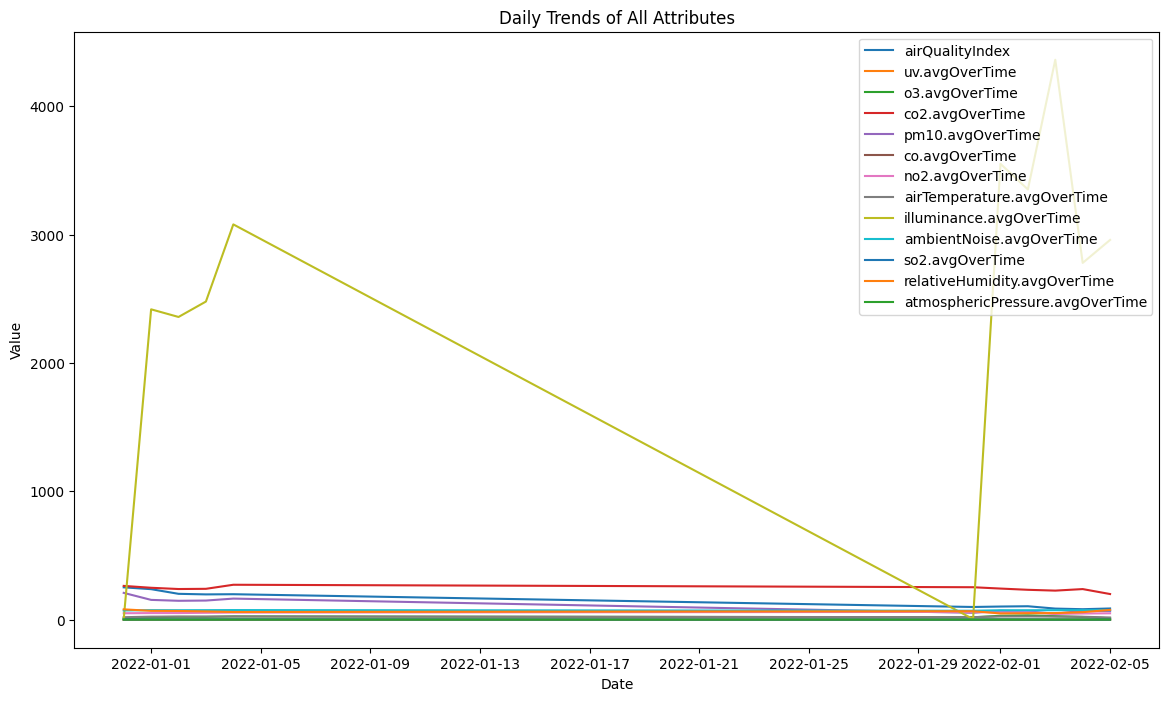

In [68]:
valid_features = [feature for feature in selected_features if feature in daily_data.columns]
print("Valid features:", valid_features)  # Debugging step

plt.figure(figsize=(14, 8))
for feature in valid_features:
    sns.lineplot(x=daily_data['date'], y=daily_data[feature], label=feature)
plt.title("Daily Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()


In [69]:
print(data.dtypes)


airQualityLevel                    float64
observationDateTime                  int64
deviceStatus                       float64
aqiMajorPollutant                  float64
id                                 float64
airQualityIndex                      int64
uv.avgOverTime                     float64
o3.avgOverTime                     float64
pm2p5.avgOverTime                  float64
co2.avgOverTime                    float64
pm10.avgOverTime                   float64
co.avgOverTime                     float64
no2.avgOverTime                    float64
airTemperature.avgOverTime         float64
illuminance.avgOverTime            float64
ambientNoise.avgOverTime           float64
so2.avgOverTime                    float64
relativeHumidity.avgOverTime       float64
atmosphericPressure.avgOverTime    float64
date                               float64
dtype: object


In [70]:
# Convert all object-type sensor data columns to numeric (ignoring errors)
numeric_columns = [
    "uv.avgOverTime", "o3.avgOverTime", "co2.avgOverTime",
    "pm10.avgOverTime", "co.avgOverTime", "no2.avgOverTime",
    "airTemperature.avgOverTime", "illuminance.avgOverTime",
    "ambientNoise.avgOverTime", "so2.avgOverTime",
    "relativeHumidity.avgOverTime", "atmosphericPressure.avgOverTime"
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")  # Convert, set errors to NaN


In [71]:
daily_data = data.groupby("date").mean(numeric_only=True).reset_index()


In [72]:
category_data = data.groupby("date")[["airQualityLevel", "deviceStatus"]].agg(pd.Series.mode).reset_index()


In [73]:
daily_data = daily_data.merge(category_data, on="date", how="left")

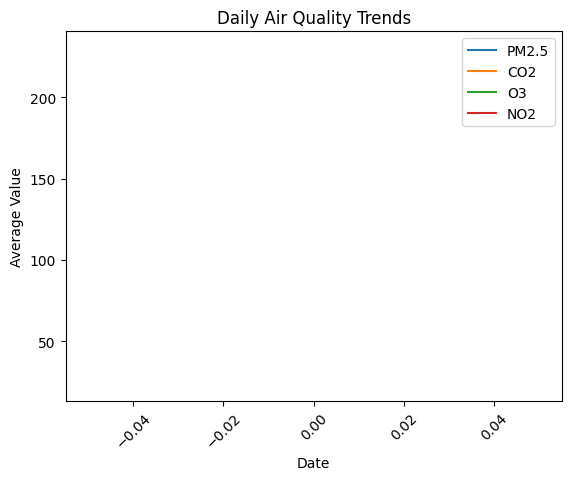

In [74]:
plt.plot(daily_data['date'], daily_data['pm2p5.avgOverTime'], label="PM2.5")
plt.plot(daily_data['date'], daily_data['co2.avgOverTime'], label="CO2")
plt.plot(daily_data['date'], daily_data['o3.avgOverTime'], label="O3")
plt.plot(daily_data['date'], daily_data['no2.avgOverTime'], label="NO2")

plt.legend(loc="upper right")
plt.xlabel("Date")
plt.ylabel("Average Value")
plt.title("Daily Air Quality Trends")
plt.xticks(rotation=45)
plt.show()


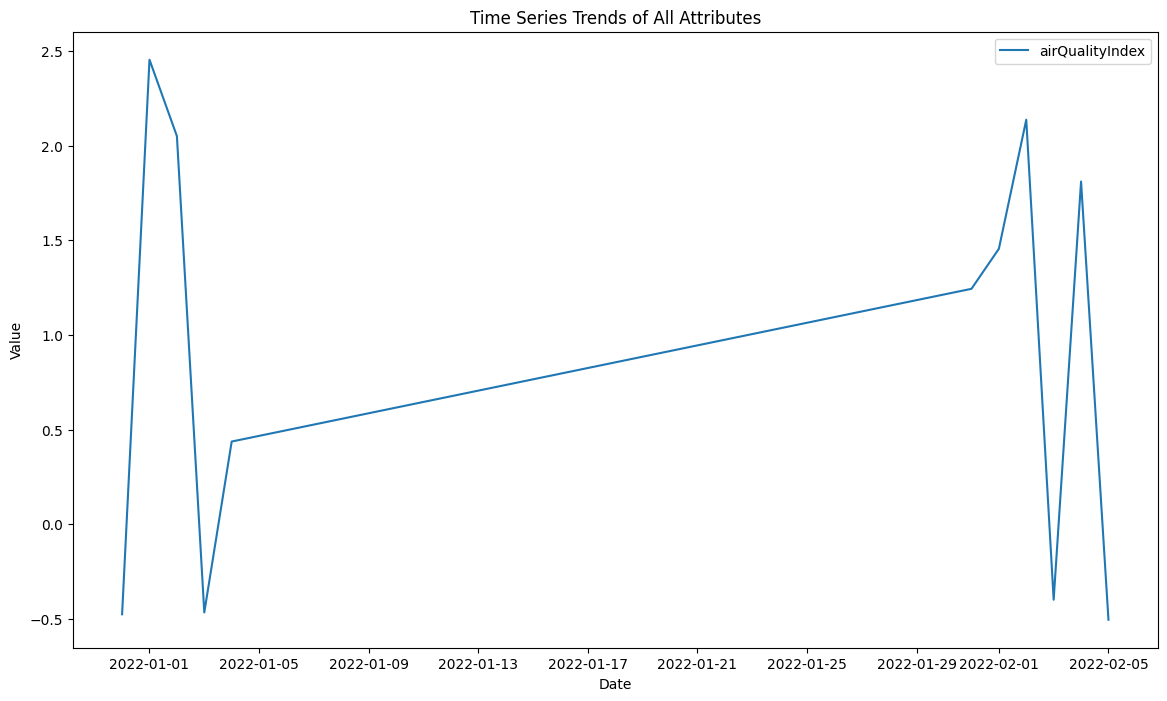

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time-series visualization for key attributes
plt.figure(figsize=(14, 8))

# Plot each feature separately
sns.lineplot(x=daily_data['date'], y=data['airQualityIndex'], label='airQualityIndex')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

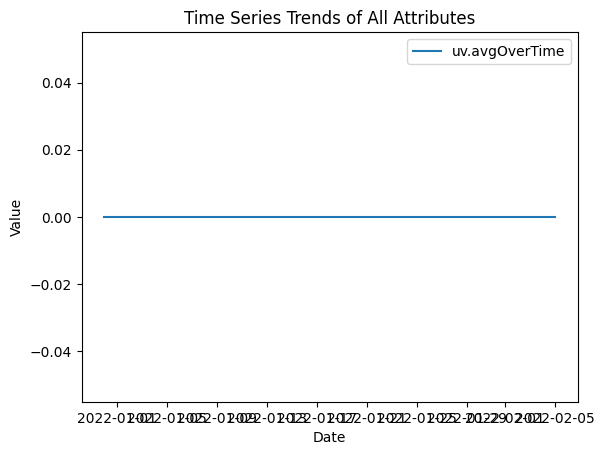

In [ ]:
sns.lineplot(x=daily_data['date'], y=data['uv.avgOverTime'], label='uv.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

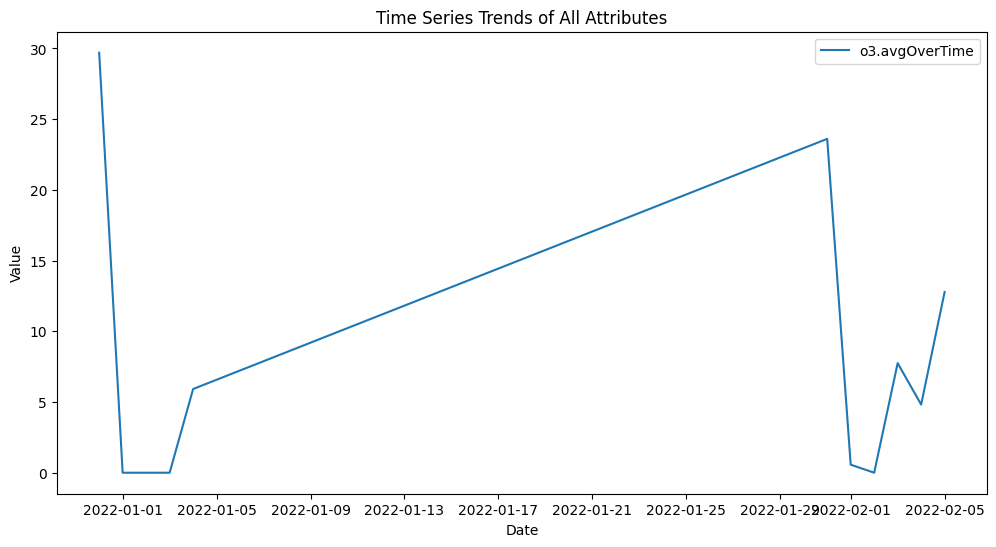

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['o3.avgOverTime'], label='o3.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

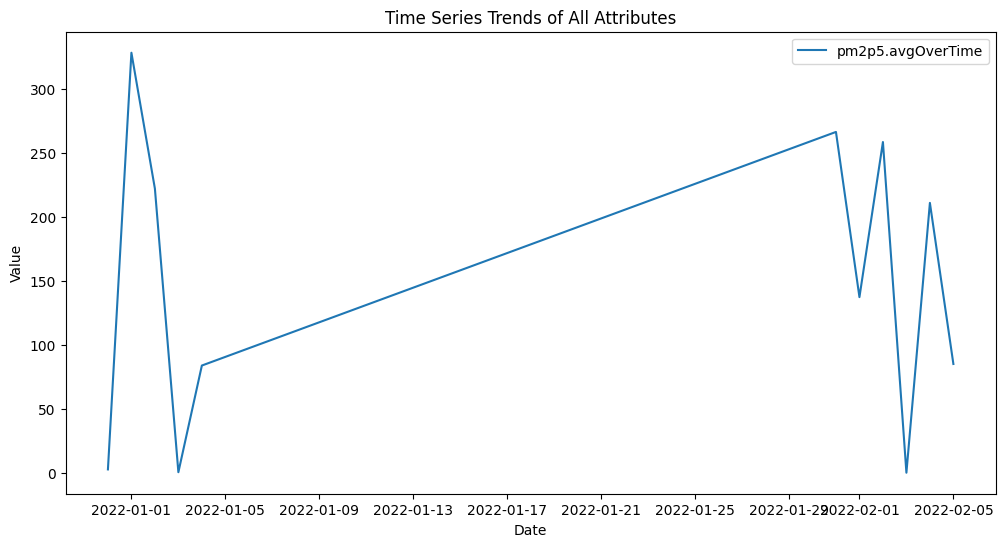

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['pm2p5.avgOverTime'], label='pm2p5.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

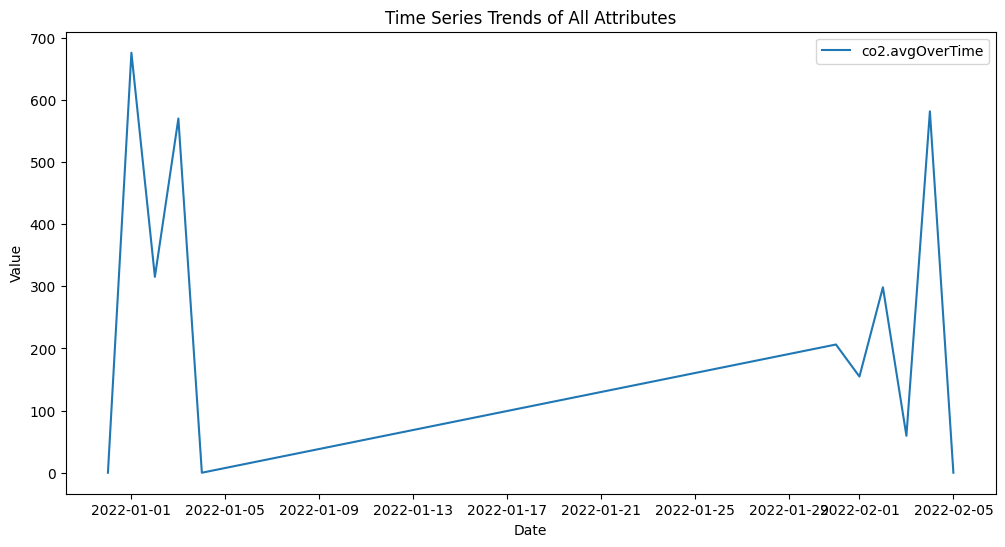

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['co2.avgOverTime'], label='co2.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

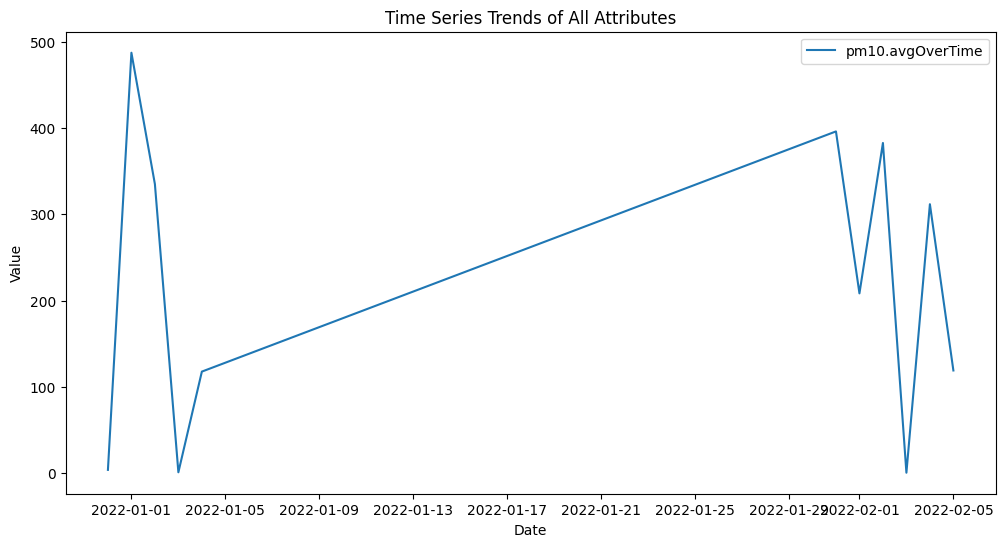

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['pm10.avgOverTime'], label='pm10.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

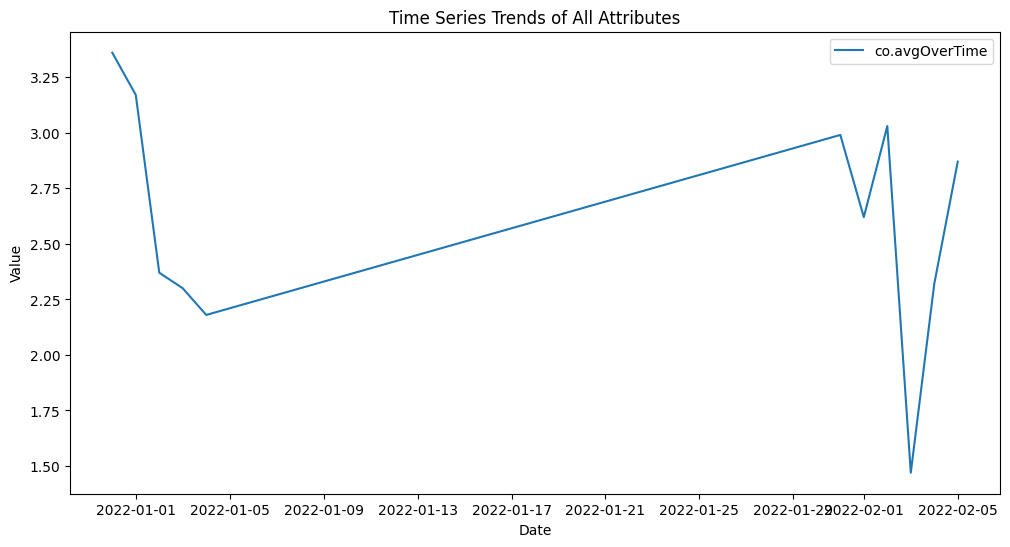

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['co.avgOverTime'], label='co.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

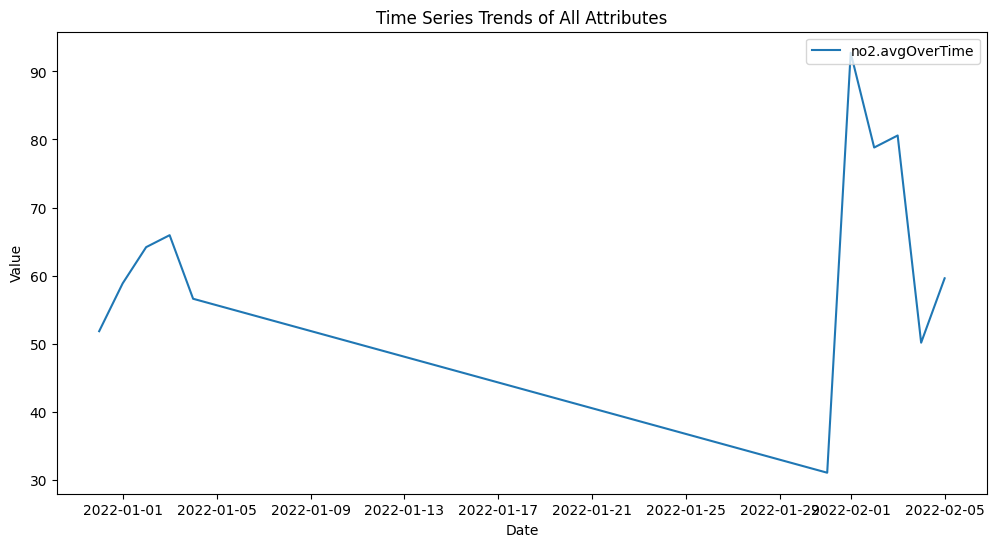

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['no2.avgOverTime'], label='no2.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

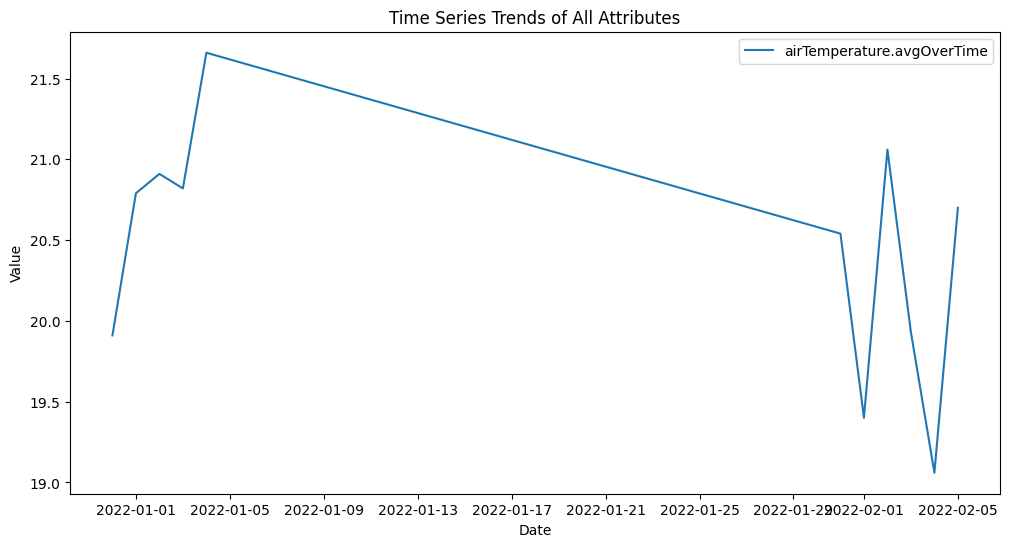

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['airTemperature.avgOverTime'], label='airTemperature.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.show()

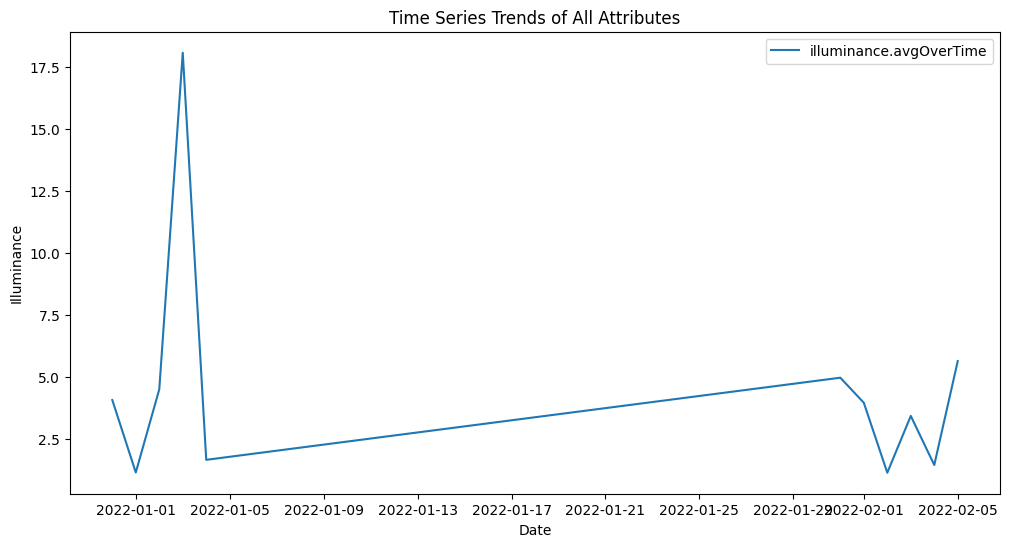

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['illuminance.avgOverTime'], label='illuminance.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("Illuminance")
plt.legend(loc="upper right")
plt.show()

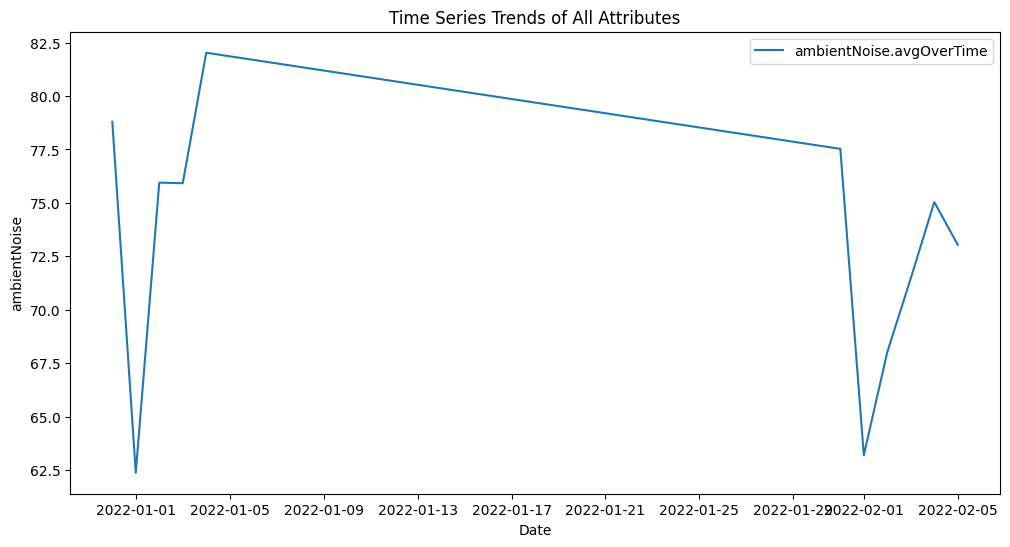

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['ambientNoise.avgOverTime'], label='ambientNoise.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("ambientNoise")
plt.legend(loc="upper right")
plt.show()

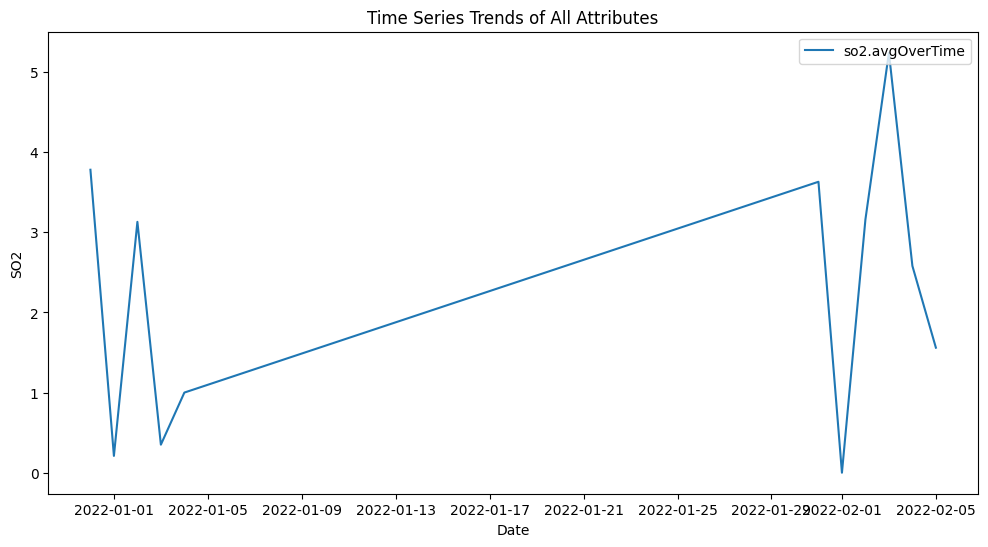

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['so2.avgOverTime'], label='so2.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("SO2")
plt.legend(loc="upper right")
plt.show()

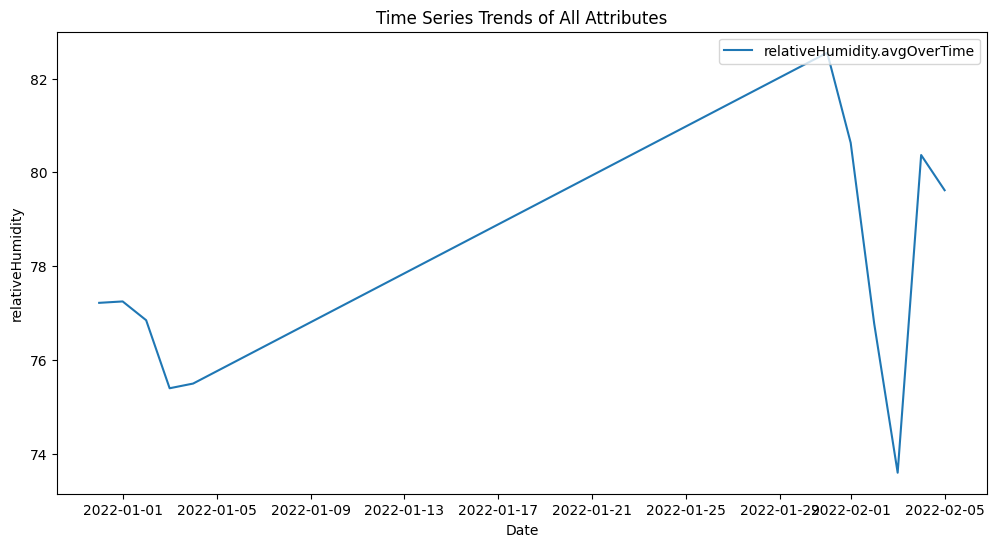

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['relativeHumidity.avgOverTime'], label='relativeHumidity.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("relativeHumidity")
plt.legend(loc="upper right")
plt.show()

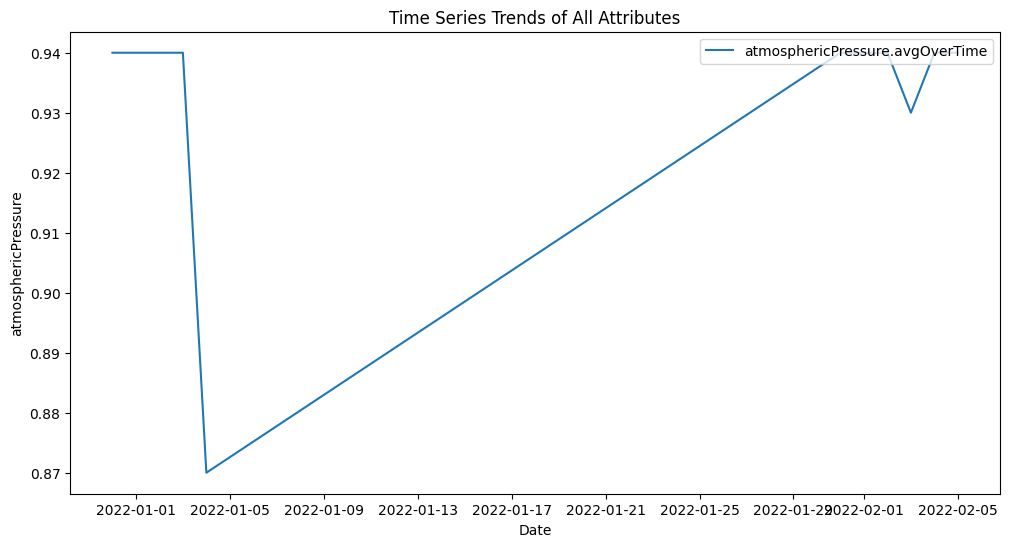

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_data['date'], y=data['atmosphericPressure.avgOverTime'], label='atmosphericPressure.avgOverTime')
plt.title("Time Series Trends of All Attributes")
plt.xlabel("Date")
plt.ylabel("atmosphericPressure")
plt.legend(loc="upper right")
plt.show()

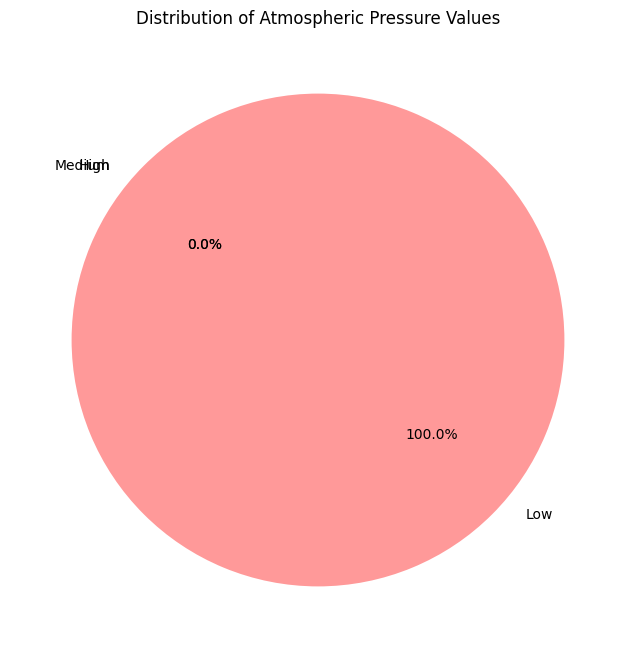

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example categorization of atmospheric pressure values into bins
pressure_bins = ['Low', 'Medium', 'High']
pressure_labels = pd.cut(data['atmosphericPressure.avgOverTime'], bins=[-float('inf'), 980, 1010, float('inf')], labels=pressure_bins)

# Calculate the count for each bin
pressure_counts = pressure_labels.value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pressure_counts, labels=pressure_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Distribution of Atmospheric Pressure Values")
plt.show()


In [76]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data preparation for all selected features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[selected_features])

# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 7
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64),
    Dense(len(selected_features))  # Output for all selected features
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Predict future trends
future_predictions = model.predict(X_test)
future_predictions = scaler.inverse_transform(future_predictions)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0228 - val_loss: 0.0190
Epoch 2/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0185 - val_loss: 0.0189
Epoch 3/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0183 - val_loss: 0.0194
Epoch 4/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0180 - val_loss: 0.0193
Epoch 5/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0179 - val_loss: 0.0191
Epoch 6/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0182 - val_loss: 0.0188
Epoch 7/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0182 - val_loss: 0.0195
Epoch 8/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0175 - val_loss: 0.0191
Epoch 9/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0178 - val_loss: 0.0192
Epoch 10/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0173 - val_loss: 0.0190
Epoch 11/50
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0176 - val_loss: 0.0192
Epoch 12/50
1319/1319

In [78]:
# Convert y_test back to the original scale
y_test_inverse = scaler.inverse_transform(y_test)


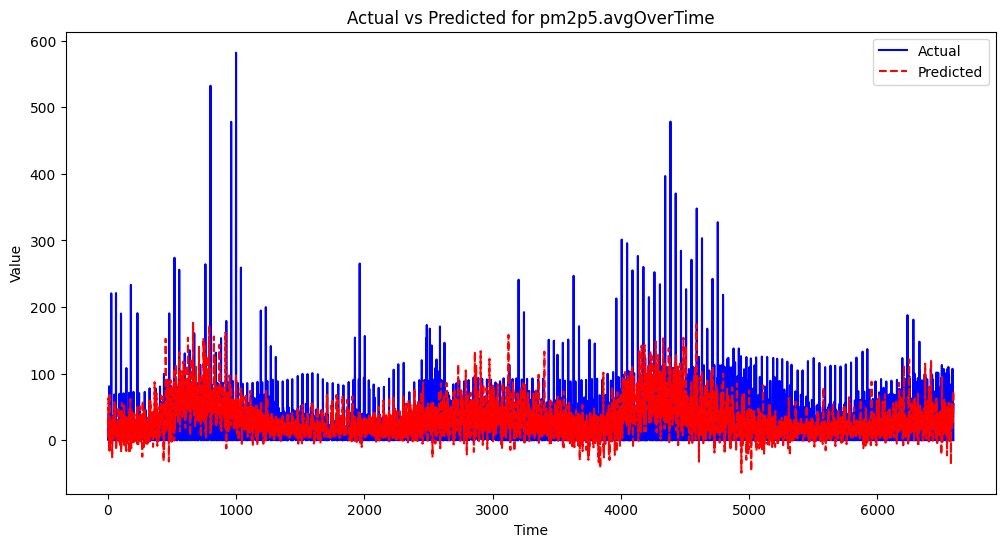

In [79]:
import matplotlib.pyplot as plt

# Choose a feature to plot (e.g., 'pm2p5.avgOverTime')
feature_idx = selected_features.index('pm2p5.avgOverTime')

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, feature_idx], label="Actual", color="blue")
plt.plot(future_predictions[:, feature_idx], label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Actual vs Predicted for {selected_features[feature_idx]}")
plt.legend()
plt.show()


In [80]:
thresholds = {
    'airQualityIndex': 100, 'uv.avgOverTime': 5, 'o3.avgOverTime': 70, 'pm2p5.avgOverTime': 100,
    'co2.avgOverTime': 1000, 'pm10.avgOverTime': 150, 'co.avgOverTime': 10, 'no2.avgOverTime': 100,
    'airTemperature.avgOverTime': 35, 'illuminance.avgOverTime': 10000, 'ambientNoise.avgOverTime': 85,
    'so2.avgOverTime': 20, 'relativeHumidity.avgOverTime': 90, 'atmosphericPressure.avgOverTime': 1
}

def detect_anomalies(data, thresholds):
    anomalies = []
    for index, row in data.iterrows():
        for feature, limit in thresholds.items():
            if row[feature] > limit:
                anomalies.append((index, feature, row[feature]))
    return anomalies

anomalies = detect_anomalies(data, thresholds)
print("Detected Anomalies:")
for anomaly in anomalies:
    print(f"Index: {anomaly[0]}, Feature: {anomaly[1]}, Value: {anomaly[2]}")


Streaming output truncated to the last 5000 lines.
Index: 22846, Feature: o3.avgOverTime, Value: 97.81
Index: 22847, Feature: airQualityIndex, Value: 188.0
Index: 22848, Feature: o3.avgOverTime, Value: 97.81
Index: 22849, Feature: airQualityIndex, Value: 182.0
Index: 22849, Feature: o3.avgOverTime, Value: 108.64
Index: 22850, Feature: airTemperature.avgOverTime, Value: 35.71
Index: 22851, Feature: airTemperature.avgOverTime, Value: 37.82
Index: 22852, Feature: o3.avgOverTime, Value: 71.59
Index: 22852, Feature: airTemperature.avgOverTime, Value: 36.38
Index: 22853, Feature: airTemperature.avgOverTime, Value: 35.07
Index: 22853, Feature: illuminance.avgOverTime, Value: 28548.88
Index: 22854, Feature: airQualityIndex, Value: 106.0
Index: 22854, Feature: airTemperature.avgOverTime, Value: 35.53
Index: 22855, Feature: o3.avgOverTime, Value: 70.68
Index: 22855, Feature: airTemperature.avgOverTime, Value: 35.13
Index: 22855, Feature: illuminance.avgOverTime, Value: 48783.47
Index: 22856, Fea

In [81]:
# Health alerts mapping
health_alerts = {
    'airQualityIndex': "AQI above 100 indicates poor air quality. Stay indoors and use air purifiers.",
    'uv.avgOverTime': "High UV levels can cause skin damage. Wear sunscreen and avoid direct sunlight.",
    'o3.avgOverTime': "Ozone above safe limits may lead to respiratory issues. Avoid outdoor activities.",
    'pm2p5.avgOverTime': "PM2.5 above safe levels can cause lung irritation. Use masks.",
    'co2.avgOverTime': "High CO2 levels may lead to drowsiness. Ensure proper ventilation.",
    'pm10.avgOverTime': "High PM10 levels can cause throat irritation. Use air filters.",
    'co.avgOverTime': "CO levels above limits are toxic. Ensure proper ventilation.",
    'no2.avgOverTime': "High NO2 levels can cause lung damage. Limit outdoor exposure.",
    'airTemperature.avgOverTime': "Extreme temperatures can lead to heatstroke or hypothermia. Stay hydrated.",
    'illuminance.avgOverTime': "High brightness may cause eye strain. Use sunglasses.",
    'ambientNoise.avgOverTime': "Noise above 85dB can damage hearing. Use ear protection.",
    'so2.avgOverTime': "SO2 exposure can lead to respiratory problems. Avoid polluted areas.",
    'relativeHumidity.avgOverTime': "High humidity can cause discomfort. Use dehumidifiers.",
    'atmosphericPressure.avgOverTime': "Sudden pressure changes may affect sensitive individuals."
}

# Print future predictions and alerts
print("Future Predictions with Precautions:")
for i, levels in enumerate(future_predictions[:7]):  # Show for the next 7 days
    print(f"Day {i+1}:")
    for j, feature in enumerate(selected_features):
        value = levels[j]
        alert = health_alerts.get(feature, "No alert")
        print(f"{feature}: {value:.2f} - {alert}")


Future Predictions with Precautions:
Day 1:
airQualityIndex: 94.84 - AQI above 100 indicates poor air quality. Stay indoors and use air purifiers.
uv.avgOverTime: 0.54 - High UV levels can cause skin damage. Wear sunscreen and avoid direct sunlight.
o3.avgOverTime: 32.27 - Ozone above safe limits may lead to respiratory issues. Avoid outdoor activities.
pm2p5.avgOverTime: 4.66 - PM2.5 above safe levels can cause lung irritation. Use masks.
co2.avgOverTime: 105.72 - High CO2 levels may lead to drowsiness. Ensure proper ventilation.
pm10.avgOverTime: 12.72 - High PM10 levels can cause throat irritation. Use air filters.
co.avgOverTime: 1.52 - CO levels above limits are toxic. Ensure proper ventilation.
no2.avgOverTime: 48.63 - High NO2 levels can cause lung damage. Limit outdoor exposure.
airTemperature.avgOverTime: 29.71 - Extreme temperatures can lead to heatstroke or hypothermia. Stay hydrated.
illuminance.avgOverTime: 5375.31 - High brightness may cause eye strain. Use sunglasses.
am